#Predicting  heart disease using machine learning

This project looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether someone has heart disease based on their medical attributes.

i am going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation




1. Problem Definition

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.



2. Data

The data is taken from : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset 

3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

4. Features

    1. age - age in years
    2. sex - (1 = male; 0 = female)
    3. cp - chest pain type
            0: Typical angina: chest pain related decrease blood supply to the heart
            1: Atypical angina: chest pain not related to heart
            2: Non-anginal pain: typically esophageal spasms (non heart related)
            3: Asymptomatic: chest pain not showing signs of disease
    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically
        cause  or concern   
    5. chol - serum cholestoral in mg/dl
    6. serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern
                    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) '>126' mg/dL signals diabetes 
    7. restecg - resting electrocardiographic results
                    0: Nothing to note
                    1: ST-T Wave abnormality
                    can range from mild symptoms to severe problems signals non-normal heart beat
                    2: Possible or definite left ventricular hypertrophy 
                        Enlarged heart's main pumping chamber
    8. thalach - maximum heart rate achieved
    9. exang - exercise induced angina (1 = yes; 0 = no)
    10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy  Heart will stress more
    11. slope - the slope of the peak exercise ST segment
                    0: Upsloping: better heart rate with excercise (uncommon)
                    1: Flatsloping: minimal change (typical healthy heart)
                    2: Downslopins: signs of unhealthy heart
    12. ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing Through  the more blood movement the better (no clots)
    13. thal - thalium stress result 1,3: normal
            6: fixed defect: used to be defect but ok now
            7: reversable defect: no proper blood movement when excercising
    14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

##Preparing the tools

In [93]:
#Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for  plots to appear inside the notebook
%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

#(exploratory data analysis or EDA)

In [2]:
df = pd.read_csv("C:\HItman\Personal\study\Machine Learning & Data science\Sample project\env\sample data\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
df.count()

age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64

In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [10]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot: >

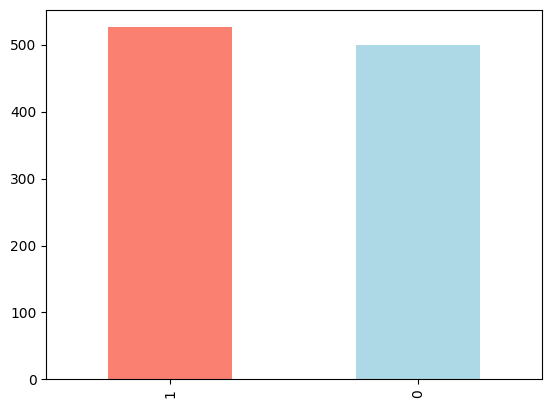

In [3]:
df["target"].value_counts().plot(kind= "bar", color = ["salmon", "lightblue"])

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [24]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,86,413
1,226,300


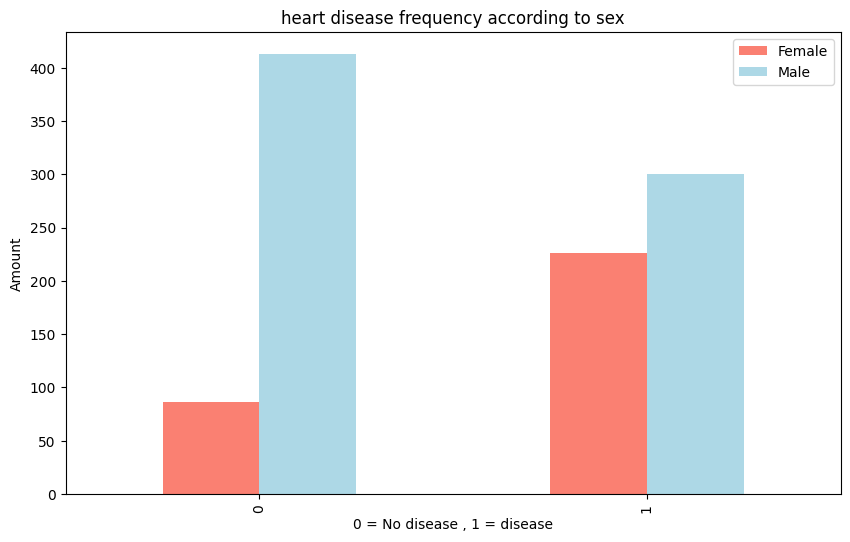

In [5]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10,6), color = ["salmon", "lightblue"])

plt.title("heart disease frequency according to sex")
plt.xlabel("0 = No disease , 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])

<AxesSubplot: ylabel='Frequency'>

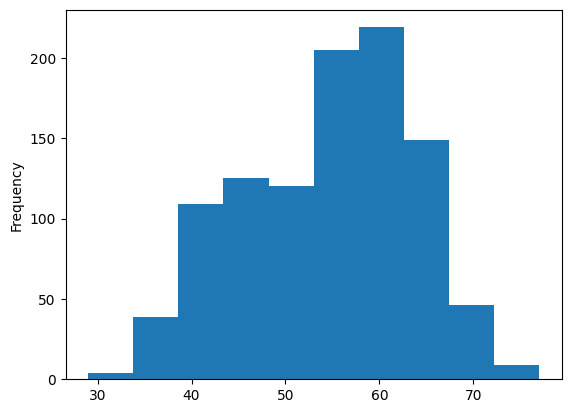

In [25]:
df["age"].plot.hist()

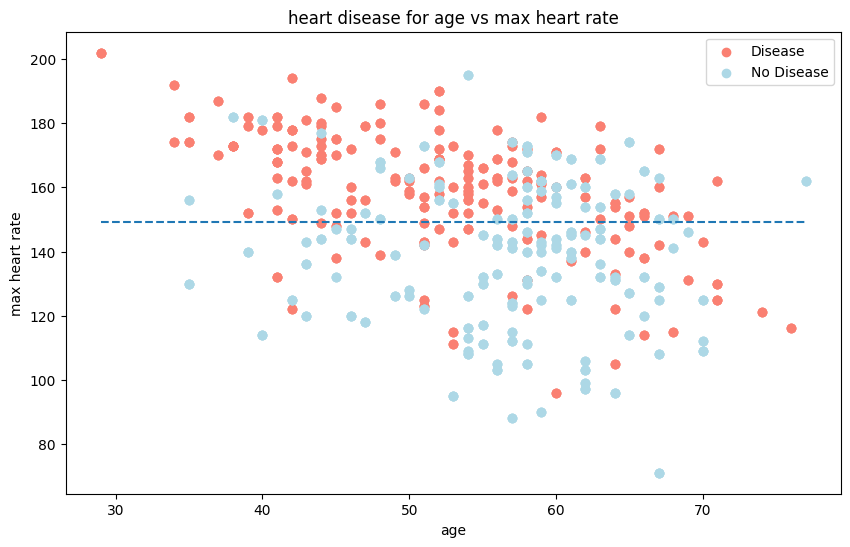

In [6]:
#Age vs Max heart Rate

plt.figure(figsize=(10,6))

#plot for positive examples
plt.scatter(df.age[df.target == 1],
                    df.thalach[df.target == 1],
                    color = "salmon")

#plot for negative examples
plt.scatter(df.age[df.target == 0],
                    df.thalach[df.target == 0],
                    color = "lightblue")

plt.title("heart disease for age vs max heart rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["Disease", "No Disease"])

plt.hlines(y=df.thalach.mean(),xmin=df.age.min(),xmax=df.age.max(), linestyles="--")


#cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

In [39]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


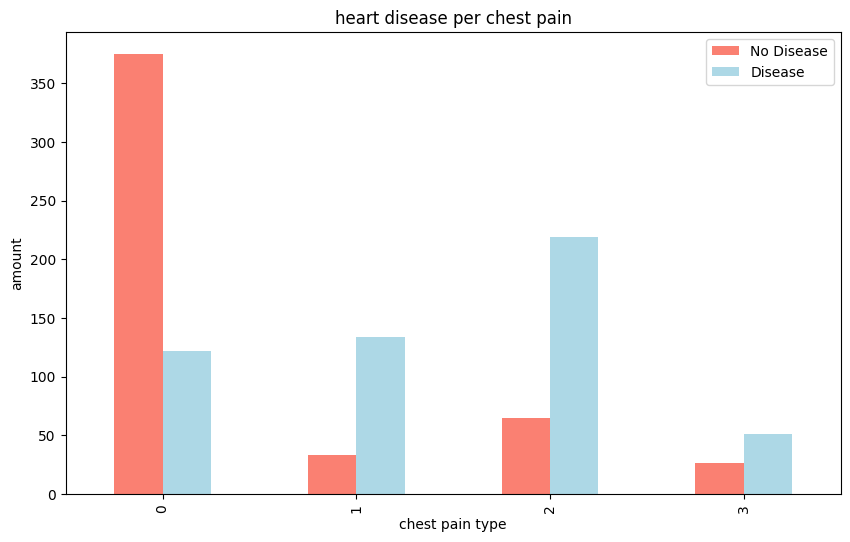

In [43]:
# Chest pain VS Target

pd.crosstab(df["cp"], df["target"]).plot(kind= "bar",
                                                                    figsize=(10,6),
                                                                    color= ("salmon", "lightblue"))

plt.title("heart disease per chest pain")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["No Disease","Disease"])

In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


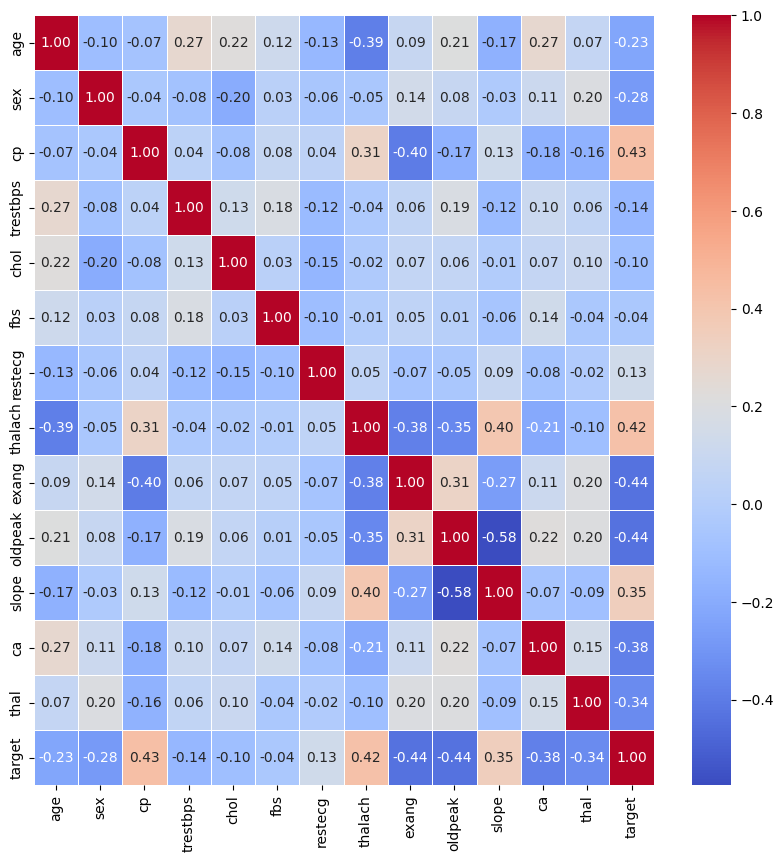

In [17]:
#correlation matrix to see how these coloumn interact with each other
corr_matrix  = df.corr()
fig, ax = plt.subplots(figsize = (10,10))
ax =sns.heatmap(corr_matrix,
                                annot=True,
                                linewidths=0.5,
                                fmt=".2f",
                                cmap="coolwarm")


5. Modeling

In [23]:
#split data into X and Y
X = df.drop("target", axis=1)
Y = df["target"]

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [25]:
np.random.seed(42)

#spliting into Test and Train sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


#building Machine Learning Model and test the data
#i am going to use 3 different machine learning model
    1. Logistic Regression
    2. K-nearest Neighbours Classifier
    3. RandomForest Classifier  

In [62]:
#Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#creating a function to fit and score Model
def fit_and_score(models, X_train, X_test,Y_train,Y_test):
    np.random.seed(42)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_score[name] = model.score(X_test, Y_test)
    return model_score

In [45]:
model_scores = fit_and_score(models = models,
                                                        X_train= X_train,
                                                        X_test= X_test,
                                                        Y_train= Y_train,
                                                        Y_test= Y_test)

model_scores

c:\HItman\Personal\study\Machine Learning & Data science\Sample project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

<AxesSubplot: >

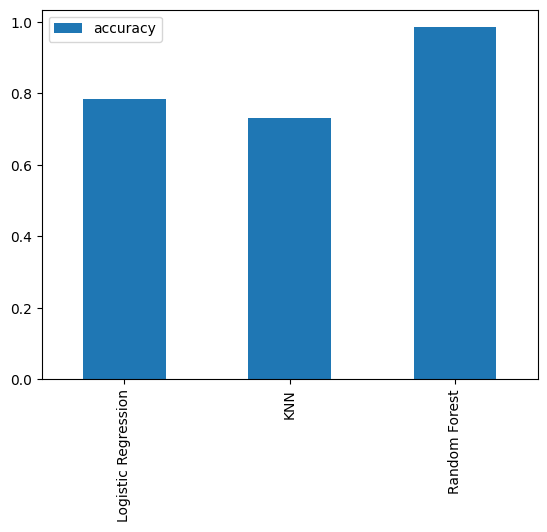

In [46]:
model_compare  = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()

Hyperparameter tuning (by hand)
Trying to tune KNN

In [47]:
train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)
    
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

In [48]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [49]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

Maximum KNN score on the test data: 98.54%


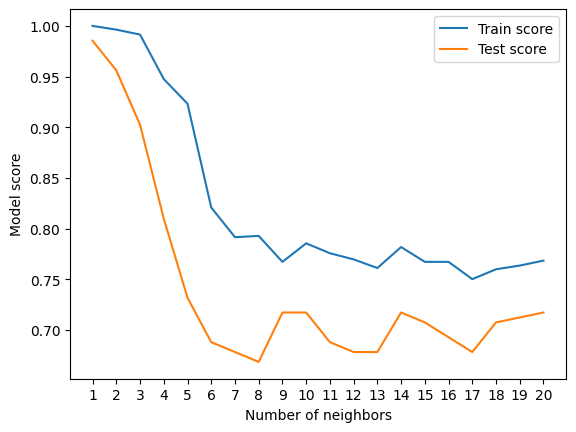

In [50]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Hyperparameter tuning with RandomizedSearchCV
Tuning LogisticRegression()

In [51]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [53]:
rs_log_reg.score(X_test, Y_test)

0.7853658536585366

Hyperparamter Tuning with GridSearchCV
Tuning LogisticRegression()

In [54]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}


gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, Y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [55]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [56]:
gs_log_reg.score(X_test, Y_test)

0.7853658536585366

Evaluting our tuned machine learning classifier, beyond accuracy
    * ROC curve and AUC score
    * Confusion matrix
    * Classification report
    * Precision
    * Recall
    * F1-score

In [64]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
y_preds = clf.predict(X_test)

In [65]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [67]:
# Create a confusion matrix using the confusion_matrix function
confusion_matrix(Y_test, y_preds)

array([[102,   0],
       [  3, 100]], dtype=int64)

Text(8.222222222222223, 0.5, 'Predicted label')

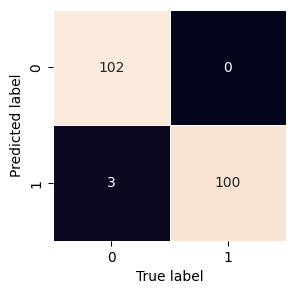

In [84]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                     annot=True,
                     linewidths=.5,
                     cbar=False,
                     fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label")

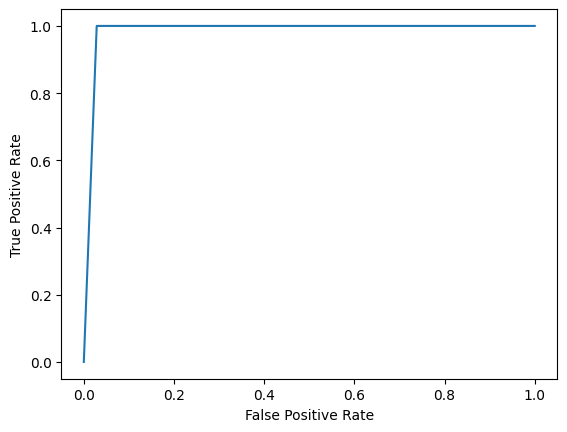

In [96]:
# Plot ROC curve and calculate and calculate AUC metric
fpr, tpr, _ = roc_curve(y_preds, Y_test)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
# classification report
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



*   Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually
        correct. A model which produces no false positives has a precision of 1.0.
*   Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false
        negatives has a recall of 1.0.
*   F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
*   Support - The number of samples each metric was calculated on.
*   Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
*   Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t
        class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
*   Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes
        Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

The classification report gives us a range of values for precision, recall and F1 score.


Calculate evaluation metrics using cross-validation

In [98]:
# Cross-validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([1.        , 1.        , 1.        , 1.        , 0.98536585])

In [99]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9970731707317073

In [100]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9944954128440366

In [101]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

1.0

In [102]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9972093023255815

<AxesSubplot: title={'center': 'Cross-validated classification metrics'}>

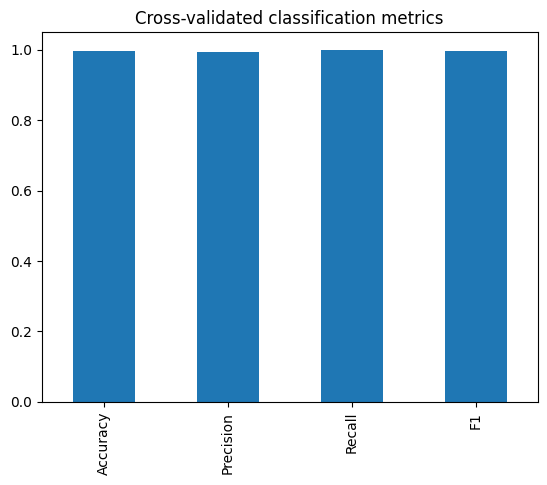

In [103]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)

Feature Importance

which features contributed most to the outcomes of the model and how did they contribute?

In [105]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [126]:
list(clf.feature_importances_)

[0.08286207364757768,
 0.027507016269562236,
 0.13990646957749206,
 0.07317647366947873,
 0.08255301326570248,
 0.00793805558357861,
 0.016975710404891393,
 0.1203847538903196,
 0.05333888626199074,
 0.11488883575598766,
 0.04688473555817493,
 0.1269111657669622,
 0.10667281034828148]

In [129]:
# Visualize feature importance
feature_dict = dict(zip(df.columns, (clf.feature_importances_)))
feature_dict

{'age': 0.08286207364757768,
 'sex': 0.027507016269562236,
 'cp': 0.13990646957749206,
 'trestbps': 0.07317647366947873,
 'chol': 0.08255301326570248,
 'fbs': 0.00793805558357861,
 'restecg': 0.016975710404891393,
 'thalach': 0.1203847538903196,
 'exang': 0.05333888626199074,
 'oldpeak': 0.11488883575598766,
 'slope': 0.04688473555817493,
 'ca': 0.1269111657669622,
 'thal': 0.10667281034828148}

<AxesSubplot: title={'center': 'Feature Importance'}>

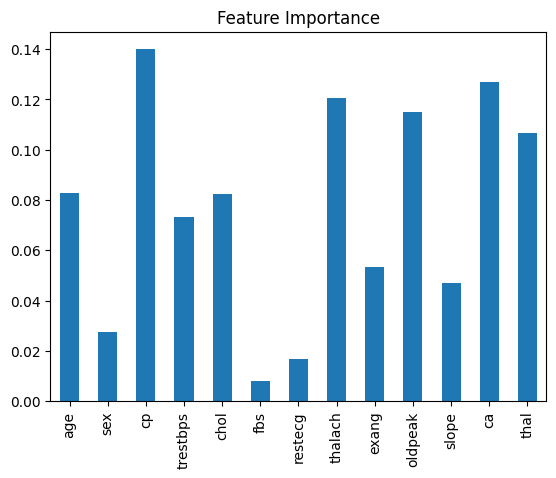

In [130]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)